In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [8]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
# for print first five rows in data
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
stroke.shape

(5110, 12)

In [10]:
stroke.columns=stroke.columns.str.lower()
stroke.isna().sum()
stroke=stroke.fillna(np.mean(stroke['bmi']))
stroke.isna().sum()
stroke['smoking_status'].replace('Unknown', stroke['smoking_status'].mode()[0], inplace=True)
stroke.drop('id', axis=1, inplace=True)
stroke= stroke[stroke['gender'] != 'Other']

In [11]:
print("now i segregate the data into numerical and categorical values.Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.\n")

print("Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form.This will help us analyze the data better.\n")

now i segregate the data into numerical and categorical values.Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.

Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form.This will help us analyze the data better.



In [12]:
numeric_data=stroke.loc[:,stroke.nunique() > 5]
cols = [col for col in stroke.columns if col not in numeric_data]

categorical_data=stroke[cols].drop('stroke',axis=1)
numeric_data=pd.DataFrame(numeric_data)
categorical_data=pd.DataFrame(categorical_data)

People who formerly smoked and who smoke show signs of stroke way more than people who never smoked.


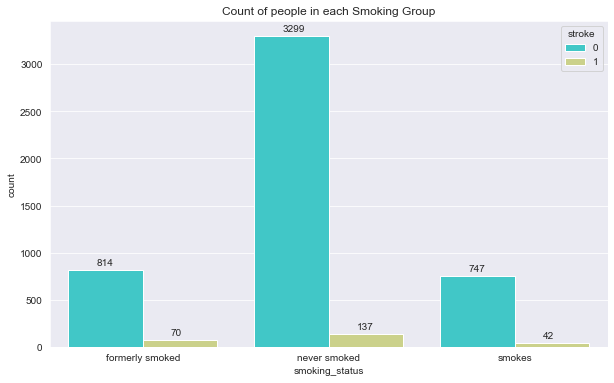

In [13]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='smoking_status',data=stroke, palette='rainbow',hue='stroke')
plt.title("Count of people in each Smoking Group")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))
print("People who formerly smoked and who smoke show signs of stroke way more than people who never smoked.")

In [14]:
print("SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.")

SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.


In [15]:
print("Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.\n")

print("The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important\n")
print("One approach to addressing imbalanced datasets is to oversample the minority class.\n")

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important

One approach to addressing imbalanced datasets is to oversample the minority class.



In [16]:
num_cols=numeric_data.columns.to_list()
sc = StandardScaler()
stroke[num_cols] = sc.fit_transform(stroke[num_cols])
le = LabelEncoder()
object_col = [col for col in stroke.columns if stroke[col].dtype == 'object']
for col in object_col:
    stroke[col] = le.fit_transform(stroke[col])

In [17]:
training_data=stroke.copy()
x= training_data.drop(['stroke'],axis=1)
y= stroke['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train,y_train)

In [19]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
lr_f1 = f1_score(lr_pred, y_test)
lr_acc

0.7544031311154599

In [20]:
decision_tree = DecisionTreeClassifier()   
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.8610567514677103

In [21]:
svm=SVC(random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
svm_acc

0.761252446183953

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.7690802348336595

In [23]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_acc = accuracy_score(xgb_pred, y_test)
xgb_acc

[21:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.923679060665362

In [25]:
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.8610567514677103

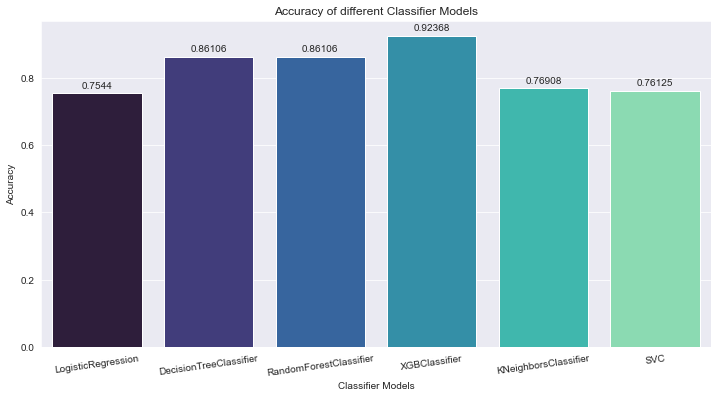

In [26]:
models_names = ["LogisticRegression",'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier',
                    'KNeighborsClassifier','SVC']
models_acc=[lr_acc,dt_acc,rf_acc,xgb_acc,knn_acc,svm_acc]

plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=models_names, y=models_acc, palette = "mako", saturation =1.5)
plt.xlabel('Classifier Models' )
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,5)}', (x + width/2, y + height*1.02), ha='center', fontsize = 10)
plt.show()

In [27]:

print("Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. Here we apply model tuning only to rf Classifier, as it has the highest accuracy so far.")

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. Here we apply model tuning only to rf Classifier, as it has the highest accuracy so far.


In [29]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=1,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 10,
    verbose=3
)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[21:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [30]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
grid_search.best_score_

0.9936482577251808

In [32]:
xgb_tuned=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1,
              monotone_constraints='()', n_estimators=160, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.2, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

xgb_tuned.fit(x_train, y_train)
xgb_tpred = xgb_tuned.predict(x_test)
xgb_tacc = accuracy_score(xgb_tpred, y_test)
xgb_tacc

[22:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9344422700587084

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc,classification_report
cm = confusion_matrix(y_test, xgb_tpred)
xgb_tprob = xgb_tuned.predict_proba(x_test)[:,1]
print(classification_report(y_test, xgb_tpred))
print('ROC AUC score: ',roc_auc_score(y_test, xgb_tprob))
print('Accuracy Score: ',accuracy_score(y_test, xgb_tpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.22      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022

ROC AUC score:  0.7747143817204301
Accuracy Score:  0.9344422700587084


In [34]:
print("Here we have completed modelling as well as tuning. The accuracy obtained is 93.5 %.")

Here we have completed modelling as well as tuning. The accuracy obtained is 93.5 %.
